In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hate_speech_dataset.csv')
df.describe()
df.drop(['Unnamed: 0','count'], axis=1, inplace=True)
df

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...
24778,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,6,0,1,youu got wild bitches tellin you lies


df.groupby('class').count()

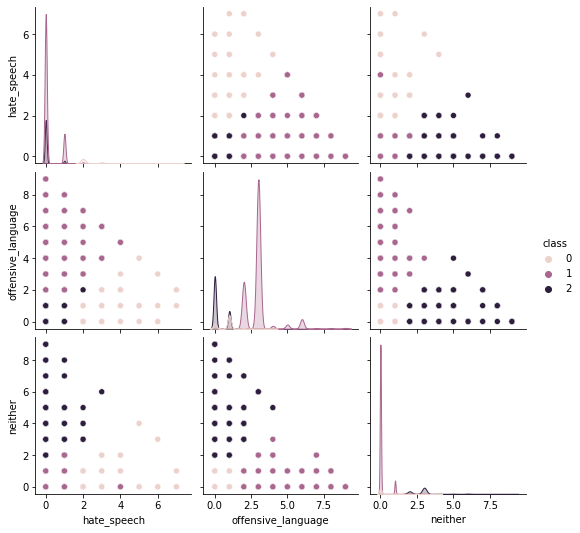

In [4]:
sns.pairplot(df, hue='class')

In [5]:
X = df['tweet']
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train : ') 
print(X_train.head()) 
print('') 
print('X_test : ') 
print(X_test.head()) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())

X_train : 
8426     Charlie Jacobs got confused about the ice buck...
3698     @JuanNDaCut @ShareA40Ounce she playin pussy ho...
10054    I be telling Mcgirt music ain't enough.You got...
3451     @IHateStevenSing\nI ain't to show bout dem col...
18673    RT @blessedarti: Y'all claim you want a good &...
Name: tweet, dtype: object

X_test : 
2281           934 8616\ni got a missed call from yo bitch
15914    RT @KINGTUNCHI_: Fucking with a bad bitch you ...
18943    RT @eanahS__: @1inkkofrosess lol my credit ain...
16407    RT @Maxin_Betha Wipe the cum out of them faggo...
13326    Niggas cheat on they bitch and don't expect no...
Name: tweet, dtype: object

y_train : 
8426     2
3698     1
10054    1
3451     2
18673    1
Name: class, dtype: int64

y_test : 
2281     1
15914    1
18943    2
16407    1
13326    1
Name: class, dtype: int64


In [6]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## K Neighbors Classifier

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_cv, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
knnscore = model.score(X_test_cv, y_test)
knnscore

0.8141223940820443

In [9]:
cvscore = cross_val_score(model, X_train_cv, y_train, cv=7)
knnmeancv = np.mean(cvscore)
knnmeancv

0.8022252364343361

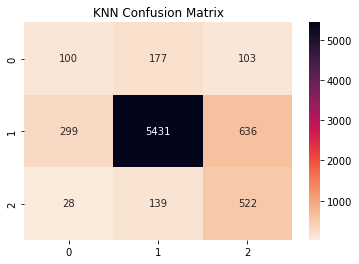

In [10]:
clf_mat = confusion_matrix(model.predict(X_test_cv), y_test)
sns.heatmap(clf_mat, annot=True, fmt='d', cmap='rocket_r')
plt.title('KNN Confusion Matrix')
plt.show()

## Logistic Regression

In [11]:
model2 = LogisticRegression()
model2.fit(X_train_cv, y_train)

LogisticRegression()

In [12]:
logscore = model2.score(X_test_cv, y_test)
logscore

0.8999327505043713

In [13]:
cvscore = cross_val_score(model2, X_train_cv, y_train, cv=7)
lrmeancv = np.mean(cvscore)
lrmeancv

0.9005073262237804

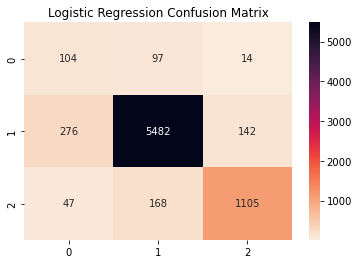

In [14]:
clf_mat = confusion_matrix(model2.predict(X_test_cv), y_test)
sns.heatmap(clf_mat, annot=True, fmt='d', cmap='rocket_r')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Decision Tree Classifier

In [15]:
#model3 = DecisionTreeClassifier()
#model3.fit(X_train_cv, y_train)

DecisionTreeClassifier()

In [16]:
DTscore = model3.score(X_test_cv, y_test)
DTscore

0.891324815063887

In [17]:
cvscore = cross_val_score(model3, X_train_cv, y_train, cv=7)
dtmeancv = np.mean(cvscore)
dtmeancv

0.8920337034246903

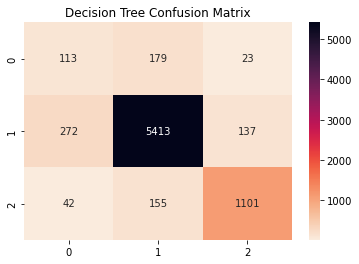

In [18]:
clf_mat = confusion_matrix(model3.predict(X_test_cv), y_test)
sns.heatmap(clf_mat, annot=True, fmt='d', cmap='rocket_r')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Random Forest Classifier

model4 = RandomForestClassifier()
model4.fit(X_train_cv, y_train)

RFscore = model4.score(X_test_cv, y_test)
RFscore

cvscore = cross_val_score(model4, X_train_cv, y_train, cv=3)
rfmeancv = np.mean(cvscore)
rfmeancv

clf_mat = confusion_matrix(model4.predict(X_test_cv), y_test)
sns.heatmap(clf_mat, annot=True, fmt='d', cmap='rocket_r')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Support Vecotor Machine

In [23]:
model5 = SVC()
model5.fit(X_train_cv, y_train)

SVC()

In [24]:
SVCscore = model5.score(X_test_cv, y_test)
SVCscore

0.899663752521856

In [25]:
#cvscore = cross_val_score(model5, X_train_cv, y_train, cv=3)
#svcmeancv = np.mean(cvscore)
#svcmeancv

0.8919762255966434

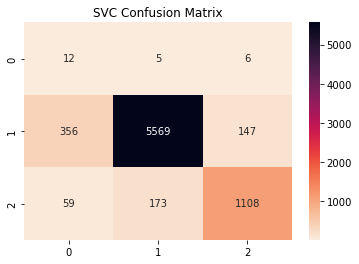

In [26]:
#clf_mat = confusion_matrix(model5.predict(X_test_cv), y_test)
#sns.heatmap(clf_mat, annot=True, fmt='d', cmap='rocket_r')
#plt.title('SVC Confusion Matrix')
#plt.show()

# bagging

In [27]:
#Implementing a bagging algorithm involves creating multiple subsets of the dataset through random sampling with replacement,
#training a base model on each subset, and then combining the predictions of these base models to form the
#final ensemble prediction. Here's a simple example using Python and the scikit-learn library:

# Define the base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)

# Define the bagging classifier
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Train the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

ValueError: Expected 2D array, got 1D array instead:
array=['Charlie Jacobs got confused about the ice bucket challenge and instead dumped a bucket of diamonds on his head.'
 '@JuanNDaCut @ShareA40Ounce she playin pussy hole bingo.\nShe drawing the next number'
 "I be telling Mcgirt music ain't enough.You gotta have a non music related agenda.Them crackers want to sell something with your face."
 ...
 '#porn,#android,#iphone,#ipad,#sex,#xxx, | #Anal | Hardcore british queer anal pounding http://t.co/lRuEixMy21'
 "RT @JennyJohnsonHi5: Just when I thought Justin Bieber couldn't be anymore of a pussy, he gets arrested in Canada for fighting a person who&#8230;"
 'bitches ain&#8217;t shit, and they ain&#8217;t saying nothin&#8217;'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Classification Report

In [ ]:
print('Logistic Regression Classification Report')
print(classification_report(model2.predict(X_test_cv), y_test))

## Summary Table

In [ ]:
data = {'Model':['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC'],
        'Accuracy':[knnscore, logscore, DTscore, RFscore, SVCscore],
        'Cross Validation':[knnmeancv, lrmeancv, dtmeancv, rfmeancv, svcmeancv]}
df = pd.DataFrame(data)
df.style.set_caption('Model Comparison')
df